In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import random

import torch
from Image_Sampler import Sampler

# Sampling Section

In [7]:
# sampler = Sampler(s_width=100, s_height=100, cam_height=4, cam_zoom=50, cam_rotation=-18)

In [2]:
sampler = Sampler(s_width=512, s_height=512, cam_height=4, cam_zoom=50, cam_rotation=-18)

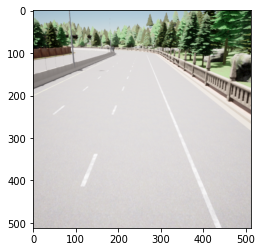

In [3]:
sampler.show_Example(random_spawn=True)

In [12]:
image = sampler.sample()

In [59]:
mock = image.transpose(2,1,0)
mock[0].shape

(512, 512)

In [80]:
tmp = []
tmp.append(mock[2])
tmp.append(mock[1])
tmp.append(mock[0])
tmp = np.array(tmp)
tmp = tmp.transpose(2,1,0)
tmp.shape

(512, 512, 3)

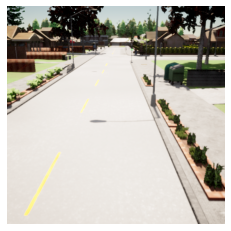

In [81]:
plt.imshow(tmp)
plt.axis("off")
plt.savefig("sample.png")

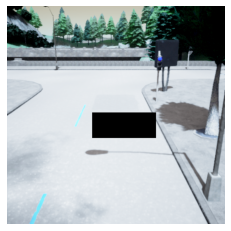

In [41]:
image[250:310,200:350,:] = 0.0
plt.imshow(image)
plt.axis("off")
plt.savefig("sample_noisy.png")

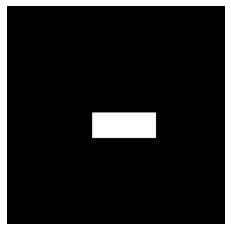

In [42]:
errormap = np.zeros((512,512,1))
errormap[250:310,200:350,:] = 0.9
plt.axis("off")
plt.imshow(errormap, cmap="gray")
plt.savefig("error_map.png")

In [20]:
sampler.collect_Samples(sample_size=70)

finished world! 10
finished world! 10
finished world! 10
finished world! 10
finished world! 10
finished world! 10
finished world! 10
Finished | Collected: 70 samples.


In [8]:
images = sampler.sample_Ride(world_model="Town07_Opt", num_of_snaps=357, tick_rate=5)

# Loading Section

In [2]:
images = Sampler.load_Images("/disk/vanishing_data/is789/anomaly_samples/300test/")

Loaded 300 images | width = 512, height = 512, channels = 3


In [3]:
images = images[:,:,:,:3]

In [3]:
images[0].shape

(512, 512, 3)

In [12]:
paths = Sampler.get_image_paths("/disk/vanishing_data/is789/anomaly_samples/Samples_2022-05-16_01:26:07/")

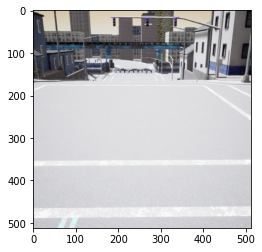

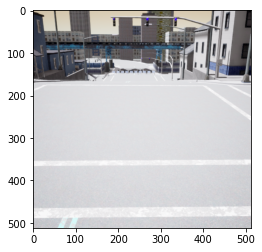

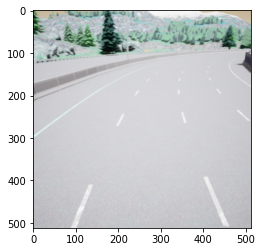

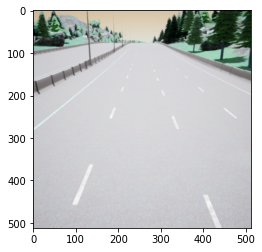

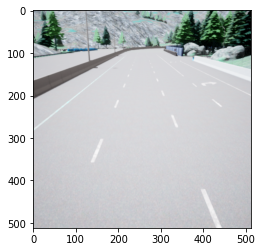

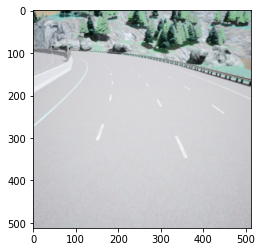

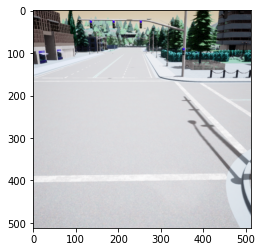

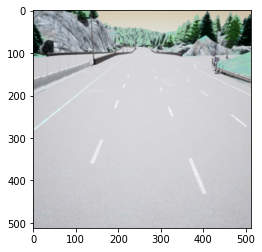

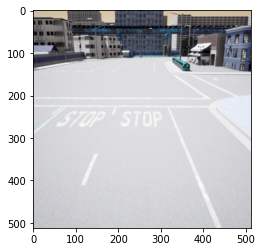

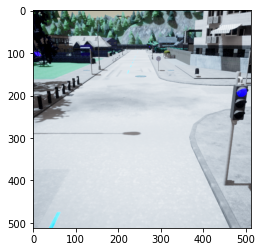

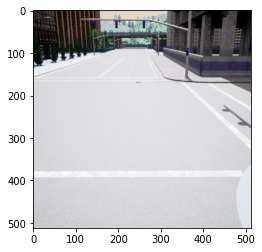

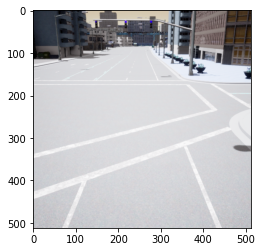

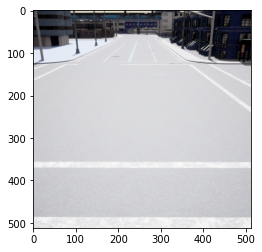

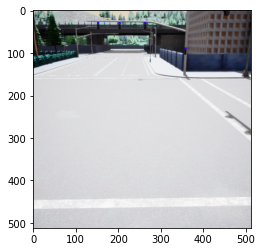

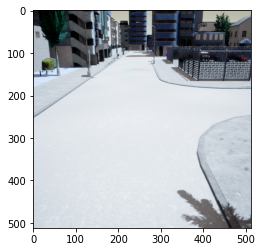

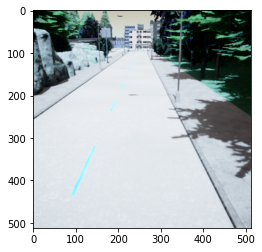

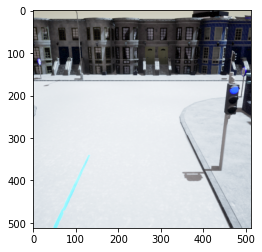

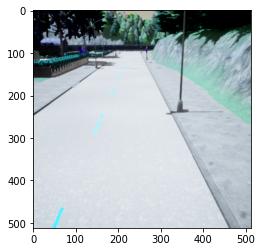

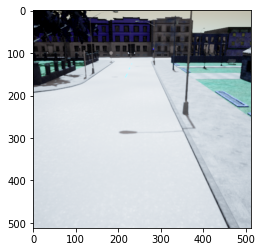

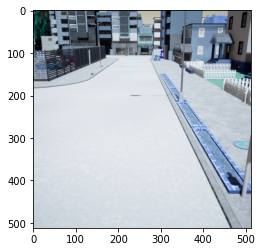

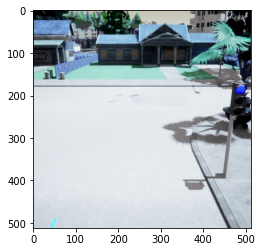

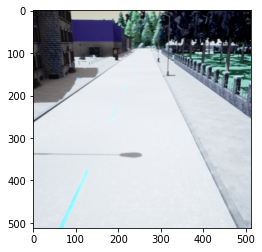

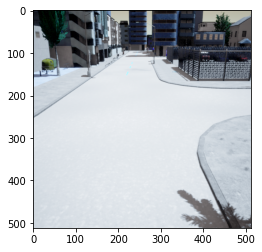

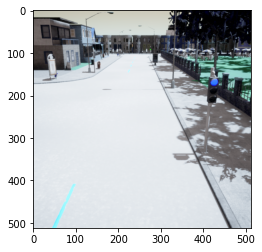

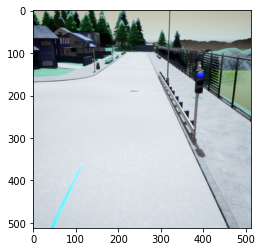

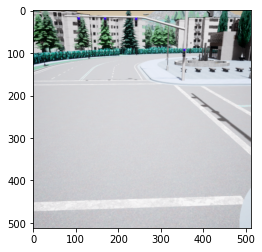

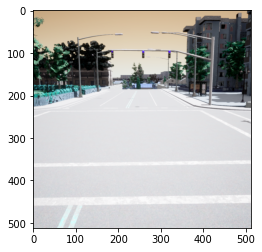

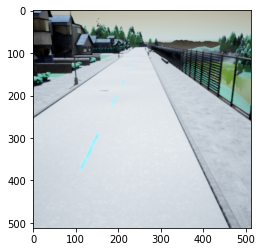

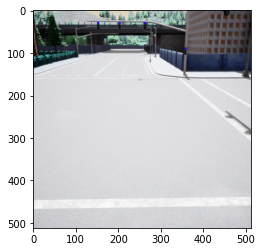

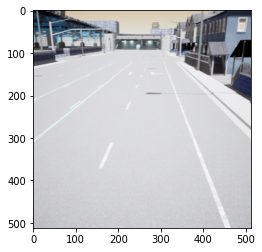

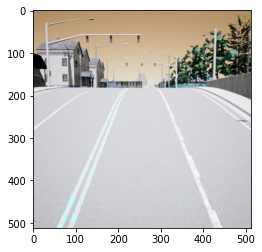

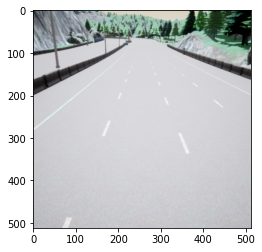

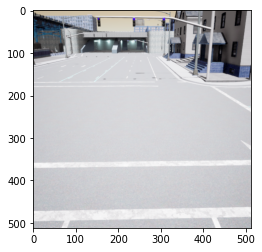

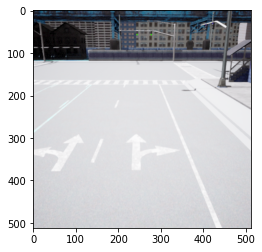

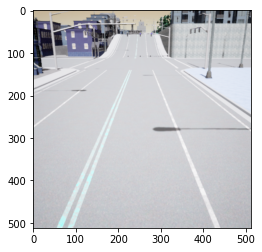

In [ ]:
for x in range(0,39):
    plt.imshow(images[x])
    plt.show()

width = 512, height = 512, channels = 3


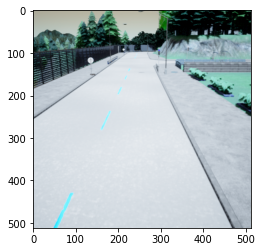

In [18]:
Sampler.sample_from_Set(images)

In [10]:
image_index = 1828
storagePath = "/disk/vanishing_data/is789/anomaly_samples/2500train/"

In [12]:
import cv2
images = np.array(images)
images = (images * 255).astype("int")
for k in range(len(images)):
    cv2.imwrite(storagePath + f"snap_{image_index}.png", images[k]) 
    # plt.imsave(storagePath + f"snap_{image_index}.png",images[k], format="png")
    image_index = image_index + 1

In [43]:
def convert_pic_to_row(pic):
    output = []
    for col in(pic):
        temp = []
        for x in range(len(col)):
            row = col[x]
            temp = np.concatenate((temp,row), axis=None)
        output = np.concatenate((output,temp), axis=None)

    result = np.array(output)
    result = result.astype(int)
    return result

In [45]:
import csv

f = open("./test.csv", 'w')

with f:

    writer = csv.writer(f)
    
    for image in images:
        image = convert_pic_to_row(image)
        writer.writerow(image)

KeyboardInterrupt: 

In [47]:
test = convert_pic_to_row(images[0])
test

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
import cv2 

In [17]:
images = np.array(images)

In [18]:
k = (images * 255).astype("int")

In [ ]:
import PIL


In [19]:
cv2.imwrite("test.png", k[10]) 

True

In [20]:
img = cv2.imread("test.png")

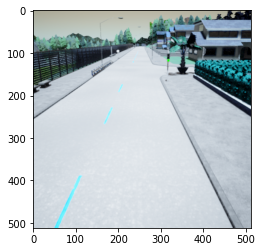

In [21]:
plt.imshow(img)

In [ ]:

def load_img_csv(path): 
    f = open("./test.csv", 'r')

    loaded_state = []
    result = []


    with f:

        reader = csv.reader(f)

        for row in reader:
            temp = []
            for e in row:
                temp.append(e)
            loaded_state.append(temp)

    return loaded_state

In [ ]:
kappa = load_img_csv("s")

In [14]:
matrix = np.eye(256, 256, dtype=np.uint8)*255
matrix = np.concatenate((np.atleast_3d(matrix), np.zeros((256, 256, 2), dtype=np.uint8)), axis=2)

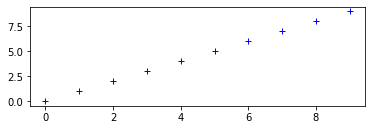

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(range(10), 'b+')

In [2]:
from PIL import Image
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

In [4]:
img = fig2img(fig)

In [5]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [6]:
image_open = Image.open("test.png")
type(image_open)

PIL.PngImagePlugin.PngImageFile

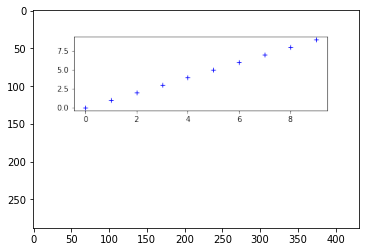

In [7]:
plt.imshow(img)

In [26]:
import cv2
import PIL
fig.savefig("test.png")
img = cv2.imread("test.png")
# img = PIL.Image.fromarray(img)

In [29]:
img = PIL.Image.frombytes('RGB', 
fig.canvas.get_width_height(),fig.canvas.tostring_rgb())

ValueError: not enough image data

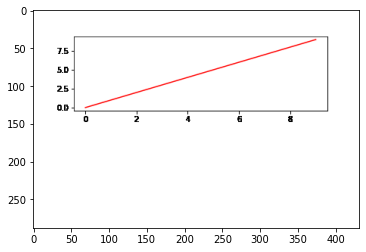

In [27]:
plt.imshow(img)

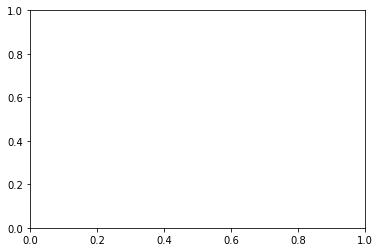

In [10]:
# Make a random plot...
fig = plt.figure()
fig.add_subplot(111)

# If we haven't already shown or saved the plot, then we need to
# draw the figure first...
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

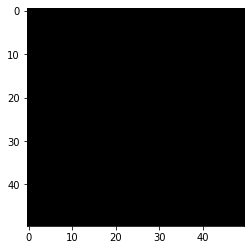

In [18]:
k = np.zeros((50,50,3))
plt.imshow(k)

In [19]:
fig = plt.figure()
fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

<Figure size 432x288 with 0 Axes>

In [20]:
data.shape

(288, 432, 3)